In [33]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from k3pi_config.modes import MODE, gcm, opposite_mode
from k3pi_utilities import parser, logger, PlotConfig
from analysis import final_selection, add_variables, selection
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from k3pi_utilities import variables as vars

from k3pi_plotting import comparison
from k3pi_config import config
from k3pi_utilities import helpers

In [3]:
config.candidates_selection = True
config.optimised_selection = True

In [4]:
with MODE('MagBoth', 1516, 'WS'):
    extra_vars = [
        gcm().ltime_var,
        PlotConfig(vars.pt, gcm().D0, (100, 0, 15000)),
        PlotConfig(vars.vdchi2, gcm().D0, (100, 0, 10), np.log, r'$\ln(\text{{{}}})$'),  # NOQA
    ]
    # opposite_mode
    with opposite_mode():
        OS = gcm().get_data([f.var for f in extra_vars])
        add_variables.append_phsp(OS)
        os_sel = final_selection.get_final_selection()
        os_sel &= selection.delta_mass_wide_signal_region()

    # Current mode stuff
    DF = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(DF)
    df_sel = final_selection.get_final_selection()
    df_sel &= selection.mass_sideband_region()


INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/delta_mass_wide_signal_regionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth151

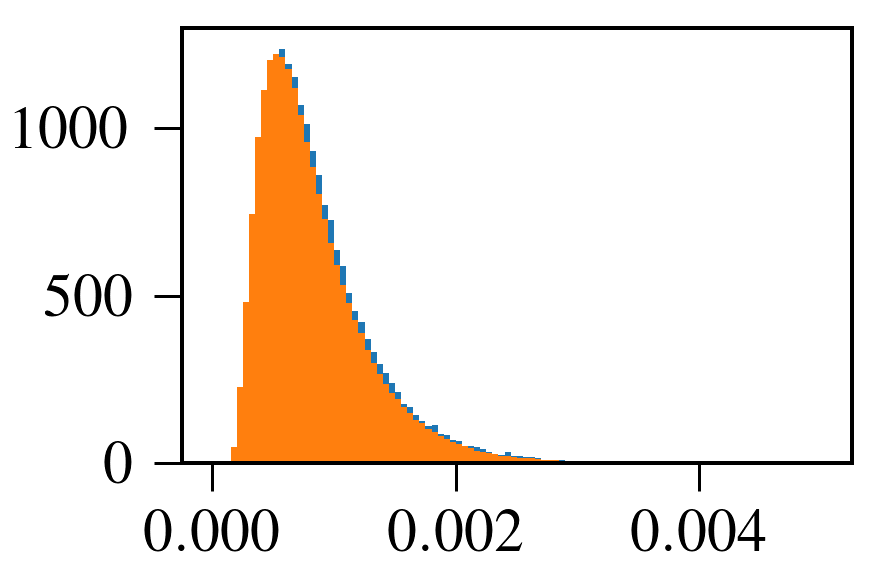

In [15]:
plt.hist(DF['D0_Loki_BPVLTIME'][df_sel], bins=100,normed=True, range=(0, 0.005));
plt.hist(OS['D0_Loki_BPVLTIME'][os_sel], bins=100,normed=True, range=(0, 0.005));

In [29]:
BKG, edges = np.histogram(DF['D0_Loki_BPVLTIME'][df_sel], bins=50,normed=True, range=(0, 0.005));
SIG, _ = np.histogram(OS['D0_Loki_BPVLTIME'][os_sel], bins=50,normed=True, range=(0, 0.005));

In [30]:
ctr = (edges[1:]+edges[:-1])/2.

In [31]:
ratio = BKG/SIG
mask = ~np.isnan(ratio)

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


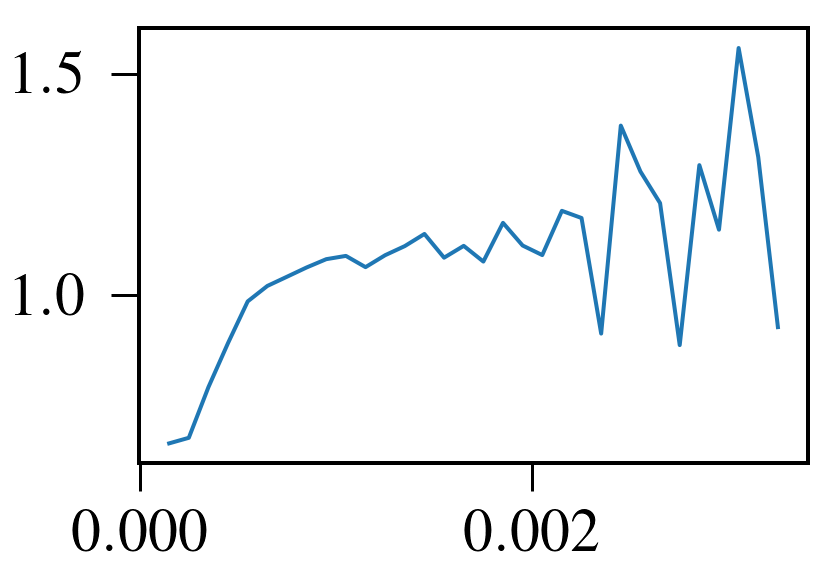

In [32]:
plt.plot(ctr[mask], ratio[mask])

In [79]:
percentiles = np.append(np.arange(0, 1.0, 0.05),[1.0])
boundaries = helpers.weighted_quantile(DF['D0_Loki_BPVLTIME'][df_sel], percentiles)

In [80]:
BKG, edges = np.histogram(DF['D0_Loki_BPVLTIME'][df_sel], bins=boundaries,range=(0, 0.005));
SIG, _ = np.histogram(OS['D0_Loki_BPVLTIME'][os_sel], bins=boundaries,range=(0, 0.005));

In [81]:
ctr = (boundaries[1:] + boundaries[:-1])/2.
ratio = BKG/SIG
ratioerr = np.sqrt((np.sqrt(BKG)/SIG)**2+(-2.*np.sqrt(SIG)*BKG/SIG**2)**2)

mask = ~np.isnan(ratio)

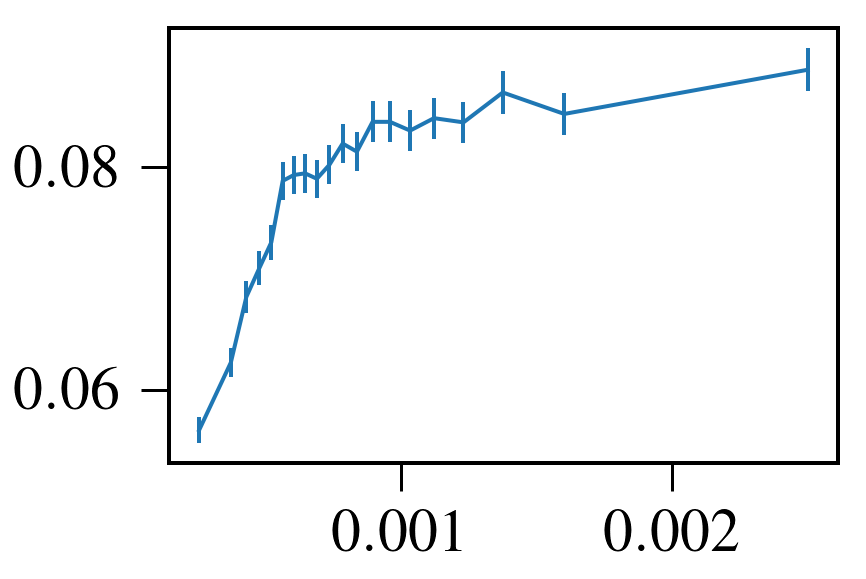

In [82]:
plt.errorbar(ctr[mask], ratio[mask], yerr=ratioerr[mask]);

In [ ]:
# Make a professional fit
def build_scaler

In [ ]:
class scaler():
    def __init__(self, ratios, ctrs, idx):
        self._first = (ctrs[0], ratios[0])
        self._last = (ctrs[-1], ratios[-1])
        self._mid = (ctrs[idx], ratios[idx])
    

In [132]:
import george
from george.kernels import ExpSquaredKernel

# Set up the Gaussian process.
kernel = ExpSquaredKernel(0.00002)
gp = george.GP(kernel)

# Pre-compute the factorization of the matrix.
gp.compute(ctr, ratioerr)

# Compute the log likelihood.
print(gp.lnlikelihood(ratio))

76.172853443


In [133]:
t = np.linspace(ctr[0], ctr[-1], 500)
mu, cov = gp.predict(ratio, t)
std = np.sqrt(np.diag(cov))

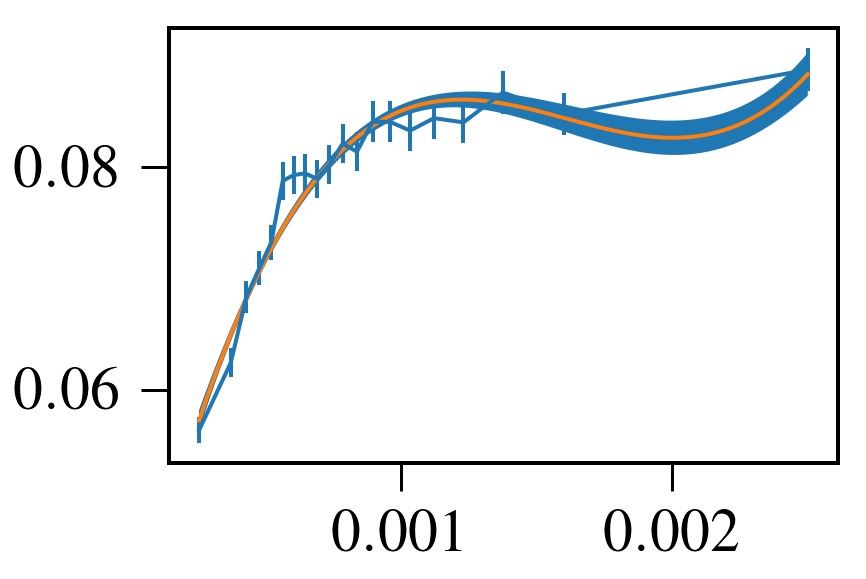

In [134]:
plt.clf()
plt.fill_between(t, mu-std,mu+std)
plt.errorbar(ctr[mask], ratio[mask], yerr=ratioerr[mask]);
plt.plot(t, mu)

In [136]:
OS['weight'] = gp.predict(ratio, OS['D0_Loki_BPVLTIME'], mean_only=True)

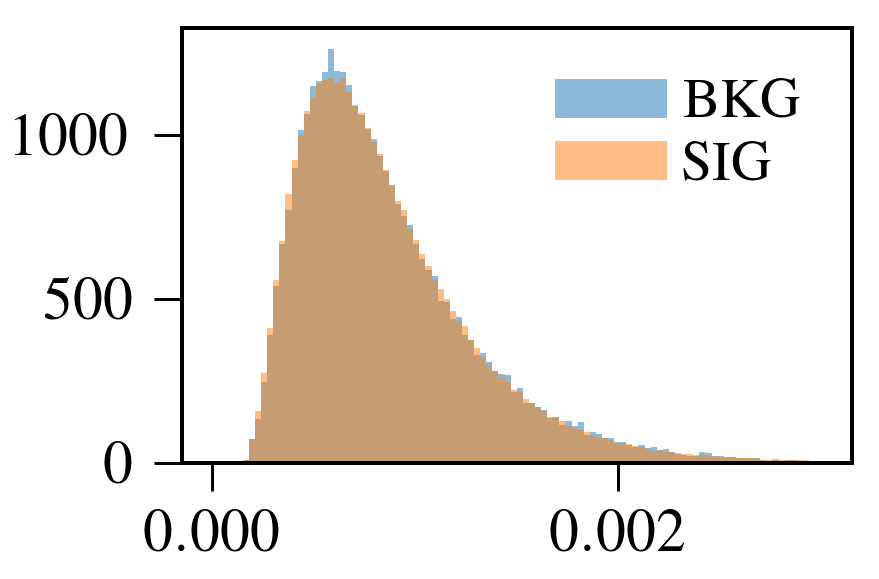

In [144]:
plt.hist(DF['D0_Loki_BPVLTIME'][df_sel], bins=100,normed=True, range=(0, 0.003), label='BKG', alpha=0.5);
plt.hist(OS['D0_Loki_BPVLTIME'][os_sel], bins=100,normed=True, range=(0, 0.003), label='SIG', alpha=0.5, weights=OS['weight'][os_sel]);
plt.gca().legend()

In [146]:
import scipy

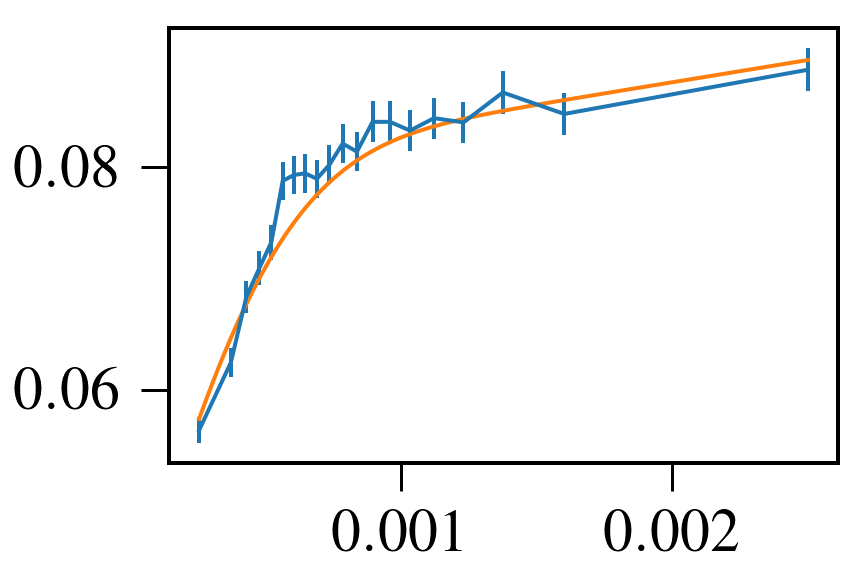

In [179]:
plt.clf()
mu = scipy.special.erf(t*1600)/24. + 0.038 + t*4
plt.errorbar(ctr[mask], ratio[mask], yerr=ratioerr[mask]);
plt.plot(t, mu)

In [161]:
OS['weight'] = scipy.special.erf(OS['D0_Loki_BPVLTIME']*1300)/21. + 0.04 + 

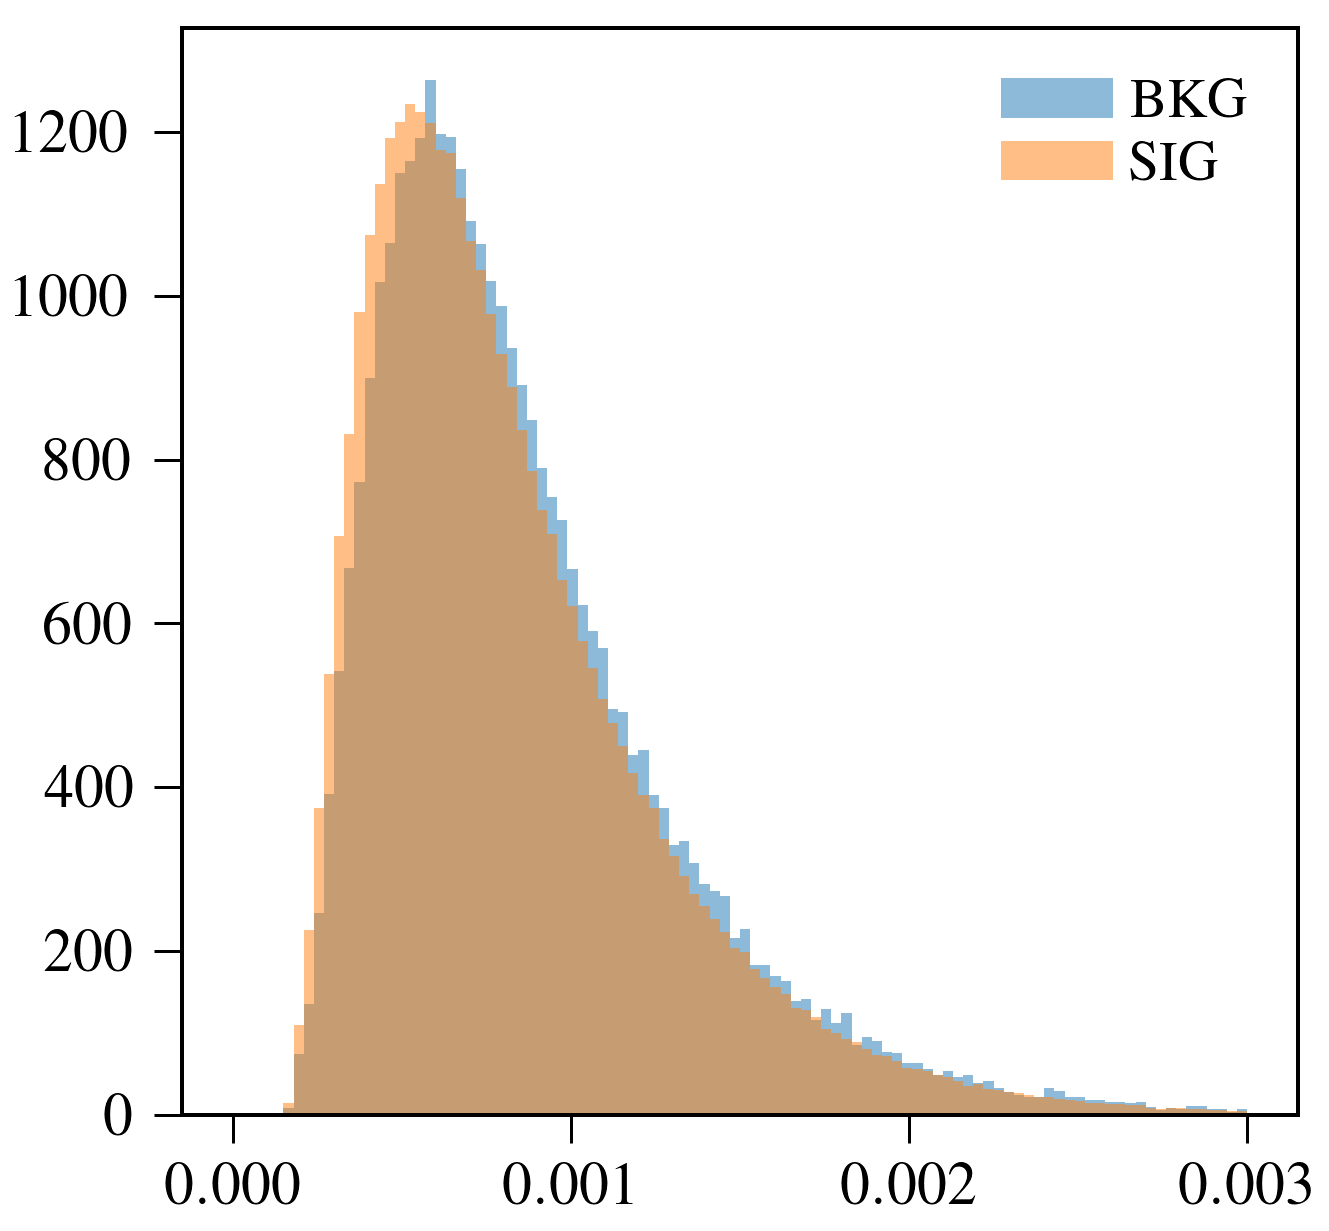

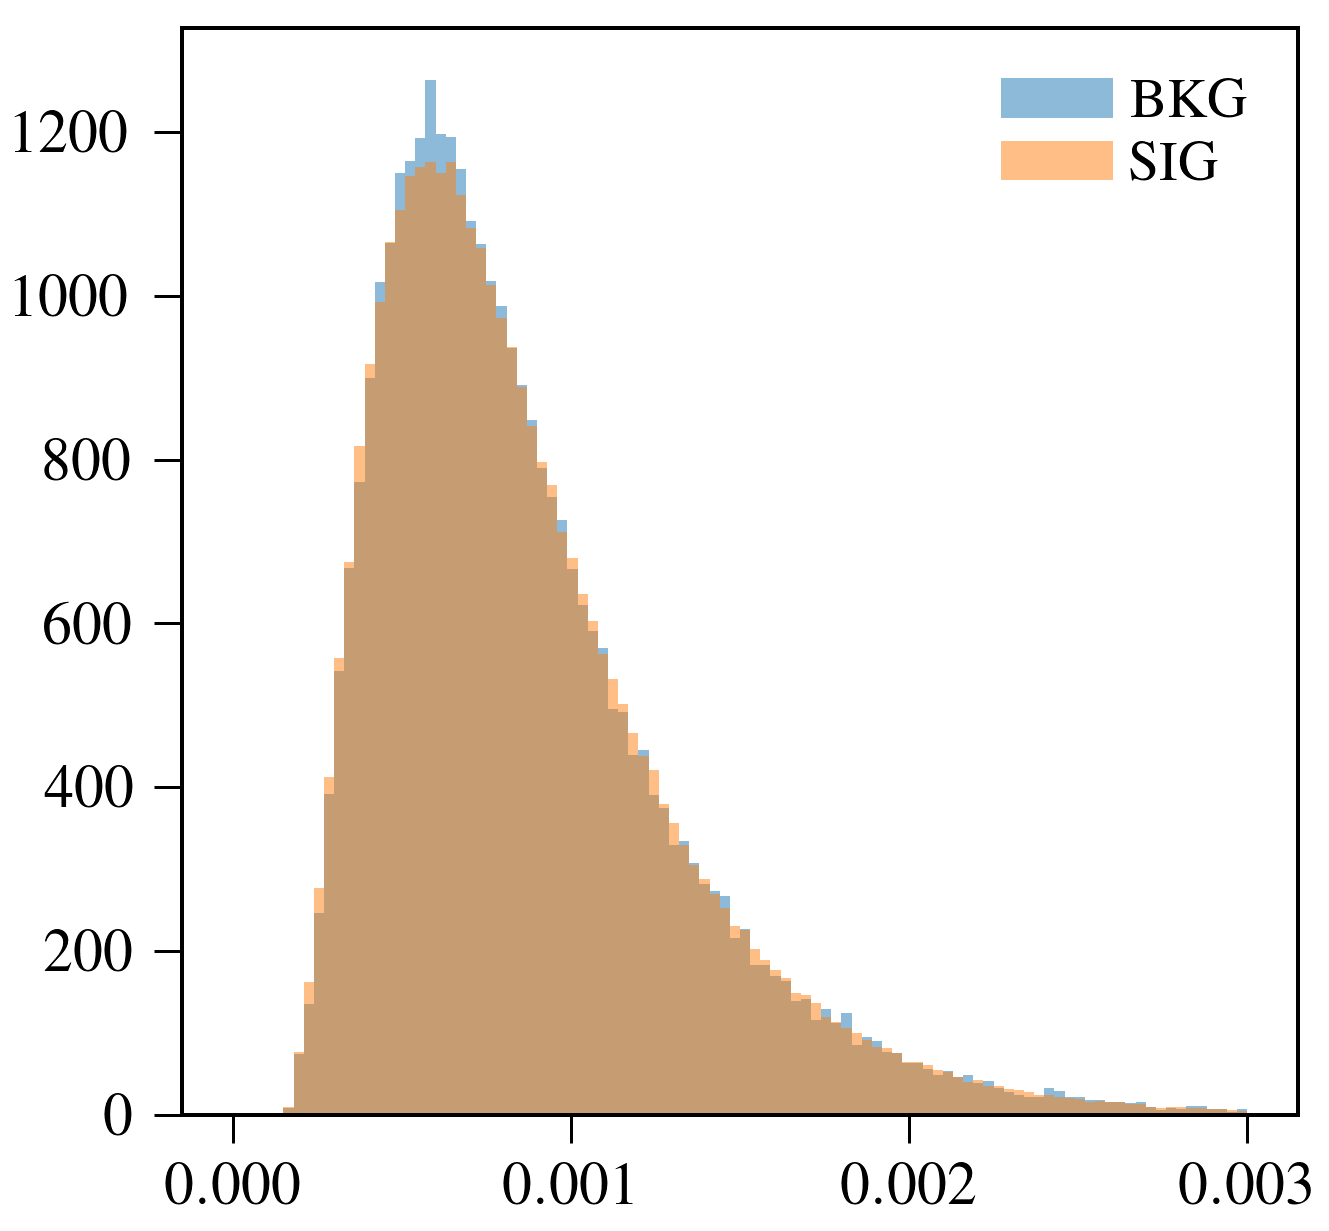

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['D0_Loki_BPVLTIME'][df_sel], bins=100,normed=True, range=(0, 0.003), label='BKG', alpha=0.5);
ax.hist(OS['D0_Loki_BPVLTIME'][os_sel], bins=100,normed=True, range=(0, 0.003), label='SIG', alpha=0.5);
ax.legend()
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['D0_Loki_BPVLTIME'][df_sel], bins=100,normed=True, range=(0, 0.003), label='BKG', alpha=0.5);
ax.hist(OS['D0_Loki_BPVLTIME'][os_sel], bins=100,normed=True, range=(0, 0.003), label='SIG', alpha=0.5, weights=OS['weight'][os_sel]);
ax.legend()

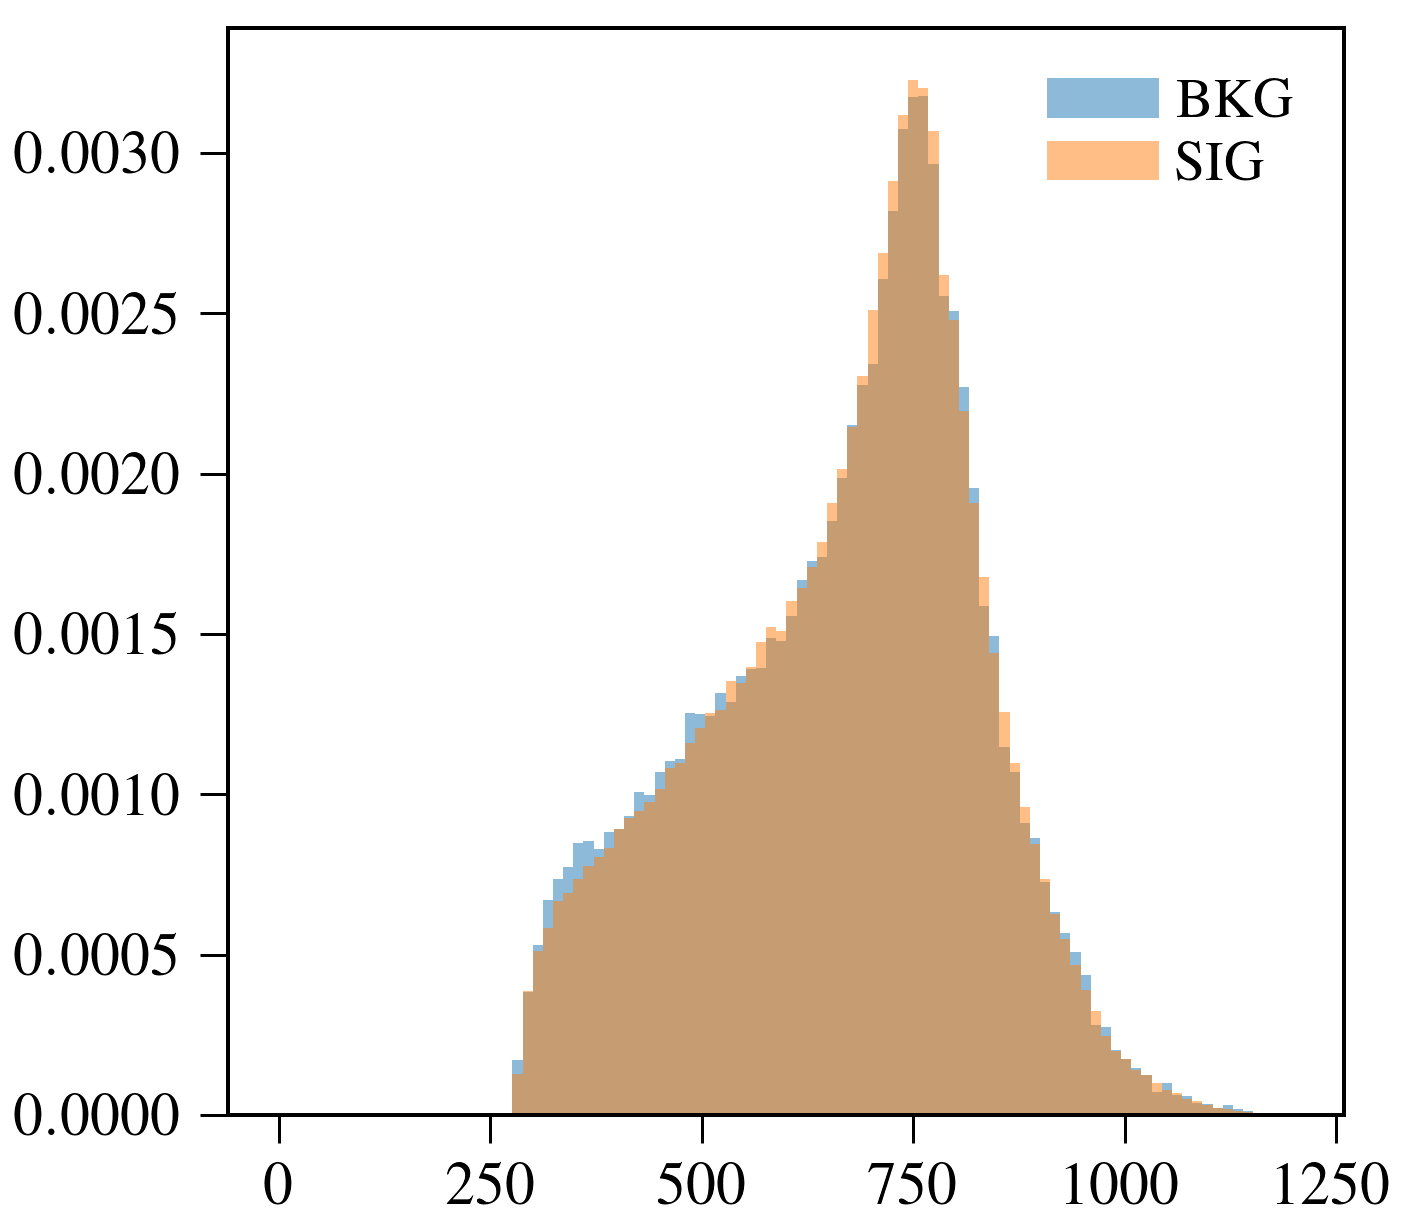

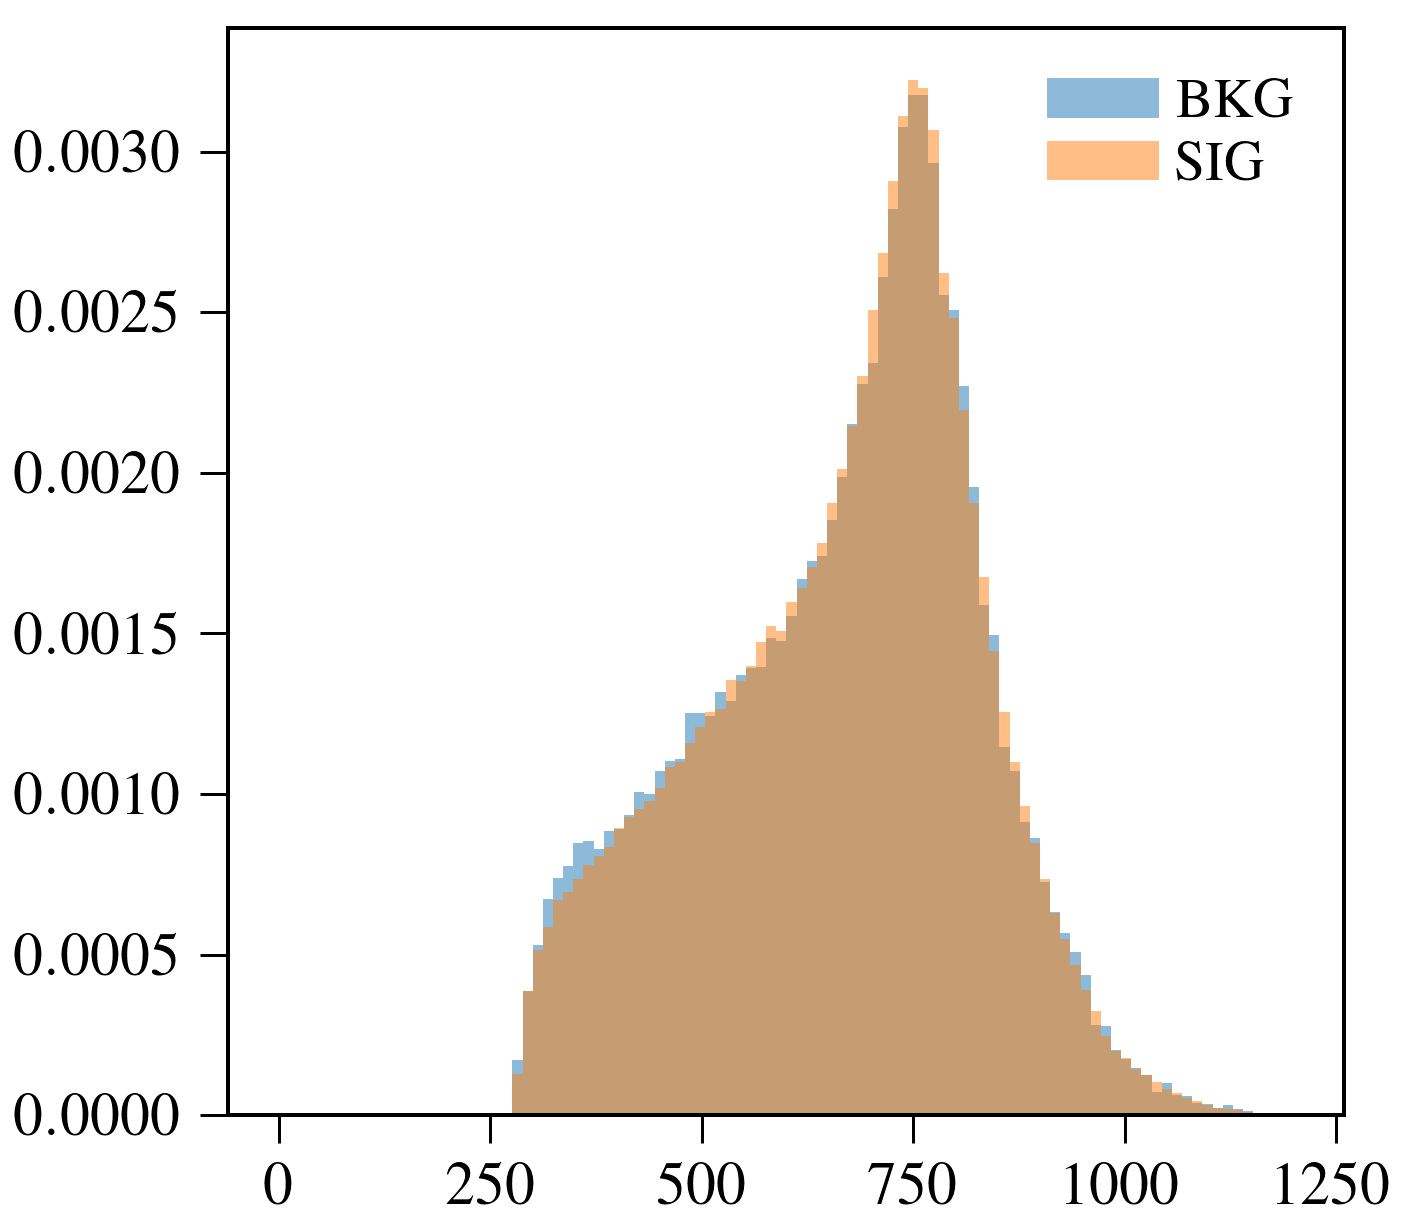

In [164]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['m12'][df_sel], bins=100,normed=True, range=(0, 1200), label='BKG', alpha=0.5);
ax.hist(OS['m12'][os_sel], bins=100,normed=True, range=(0, 1200), label='SIG', alpha=0.5);
ax.legend()
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['m12'][df_sel], bins=100,normed=True, range=(0, 1200), label='BKG', alpha=0.5);
ax.hist(OS['m12'][os_sel], bins=100,normed=True, range=(0, 1200), label='SIG', alpha=0.5, weights=OS['weight'][os_sel]);
ax.legend()

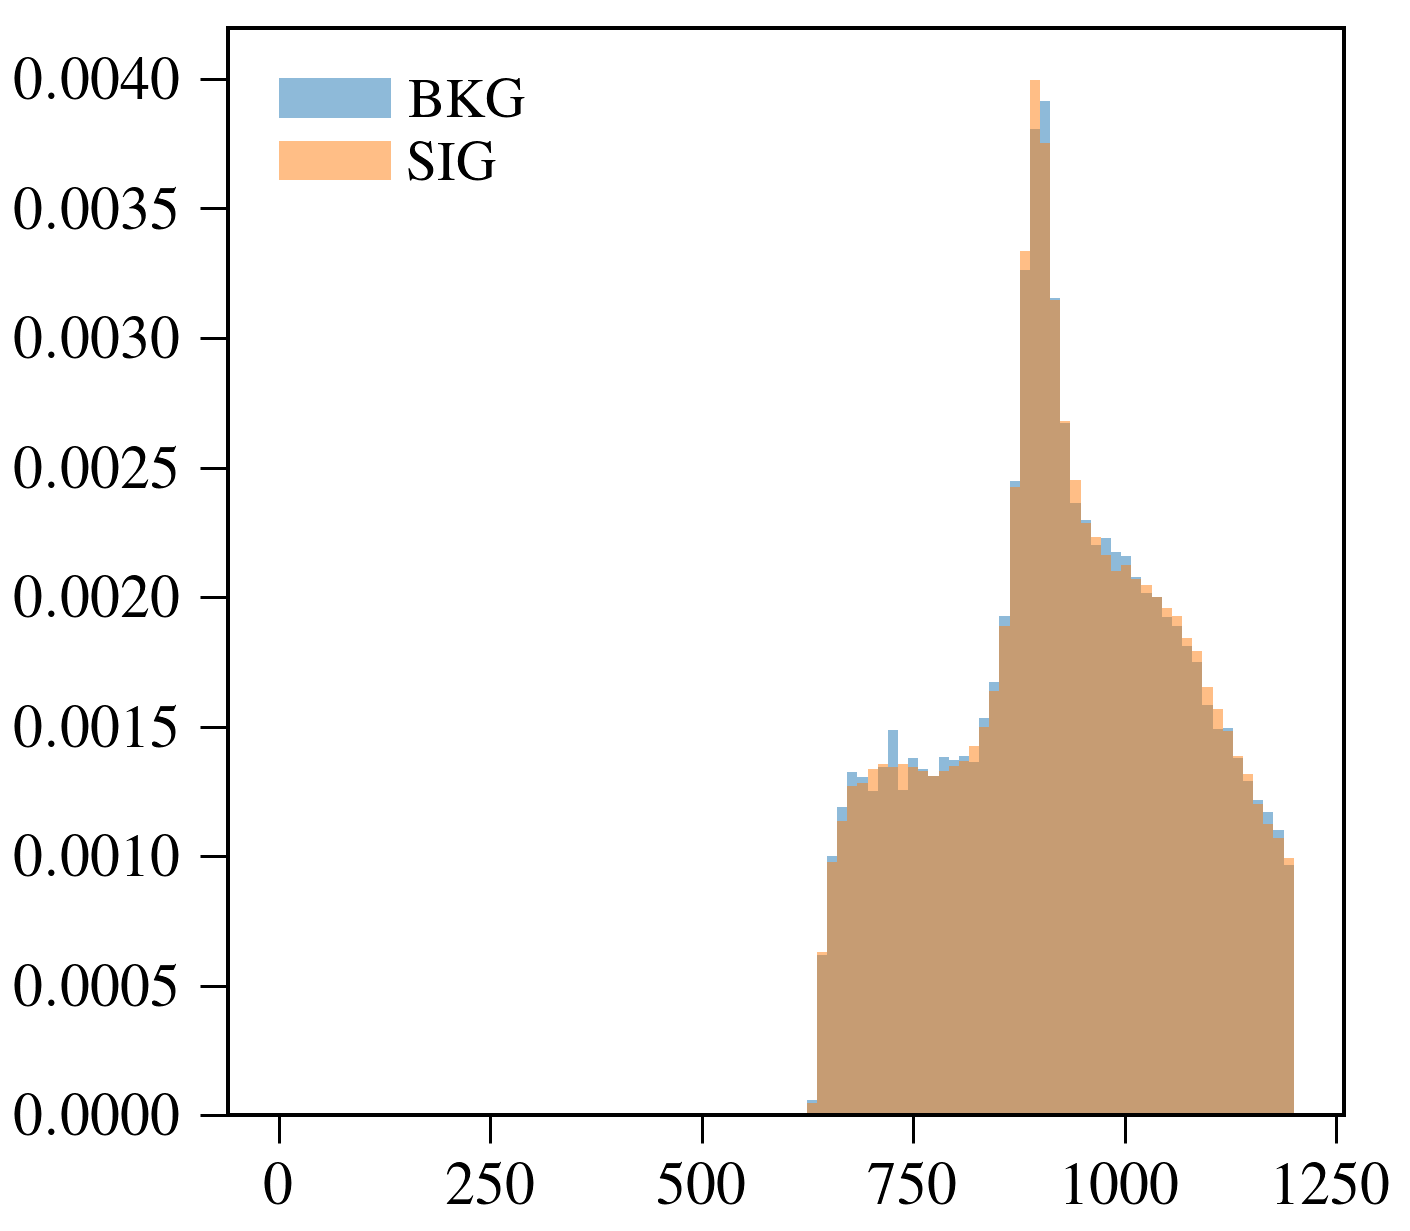

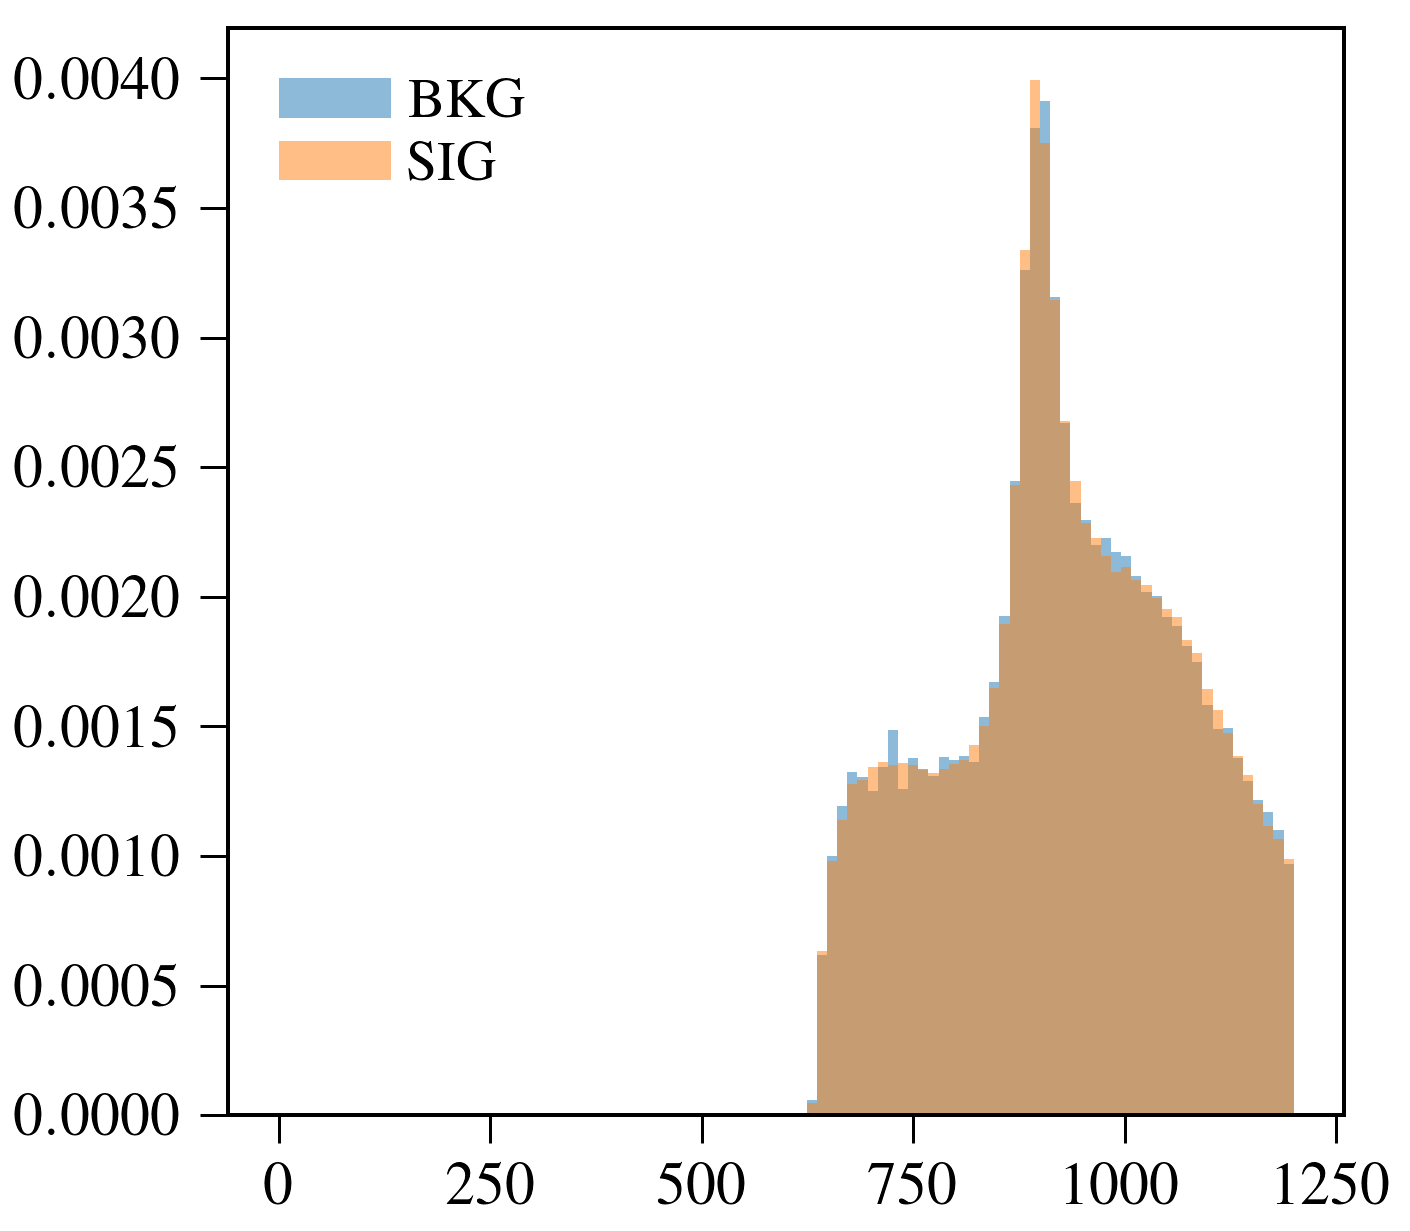

In [165]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['m34'][df_sel], bins=100,normed=True, range=(0, 1200), label='BKG', alpha=0.5);
ax.hist(OS['m34'][os_sel], bins=100,normed=True, range=(0, 1200), label='SIG', alpha=0.5);
ax.legend()
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(DF['m34'][df_sel], bins=100,normed=True, range=(0, 1200), label='BKG', alpha=0.5);
ax.hist(OS['m34'][os_sel], bins=100,normed=True, range=(0, 1200), label='SIG', alpha=0.5, weights=OS['weight'][os_sel]);
ax.legend()

In [181]:
with MODE('MagBoth', 1516, 'WS'):
    print(gcm().ltime_var.var)

D0_Loki_BPVLTIME
